### Testing the satellite code in _luseepy_

* Import prerequisites



In [3]:
import  lusee
from    lusee import Observation, Satellite, ObservedSatellite
import  numpy as np
import  matplotlib.pyplot as plt
import  lunarsky

print(f'''lusee path: {lusee.__path__[0]}''')
print(f'''lunarsky path: {lunarsky.__path__[0]}''')

lusee path: /home/maxim/projects/lusee/luseepy/lusee
lunarsky path: /home/maxim/.virtualenvs/lusee-simpy/lib/python3.10/site-packages/lunarsky


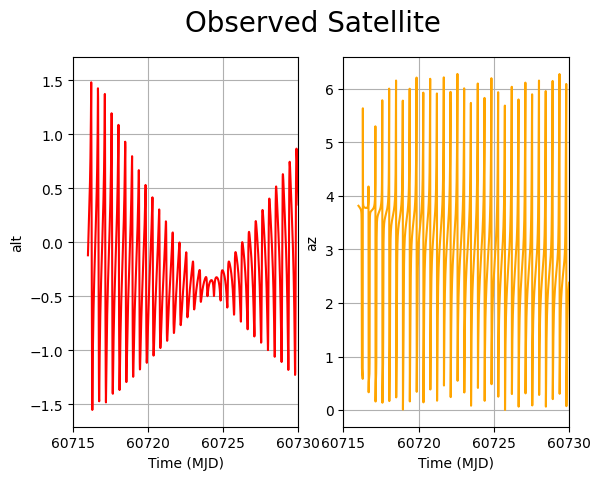

In [4]:
# Basic test of the updated ObservedSatellite object

# Two options to define the interval - tuple of strings or a more complex string:
use_tuple = True
if use_tuple:
    interval    = ("2025-02-10 00:00:00", "2025-03-07 23:45:00")
else:
    interval    = "2025-02-10 00:00:00 to 2025-03-07 23:45:00"


obs     = Observation(time_range=interval, deltaT_sec=15*60)
S       = Satellite()
obsat   = ObservedSatellite(obs, S)


fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Observed Satellite', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


#p1=plt.subplot()
p1.grid(True)
p2.grid(True)

p1.set_xlim([60715,60730])
p2.set_xlim([60715,60730])

p1.set_xlabel('Time (MJD)')
p1.set_ylabel('alt')

p2.set_xlabel('Time (MJD)')
p2.set_ylabel('az')

_ = p1.plot(obsat.mjd, obsat.alt,  color="red", label="Satellite")
_ = p2.plot(obsat.mjd, obsat.az,   color="orange", label="Satellite")

---

### Plot the trajectory

Test plot with canonical settings, for back reference.


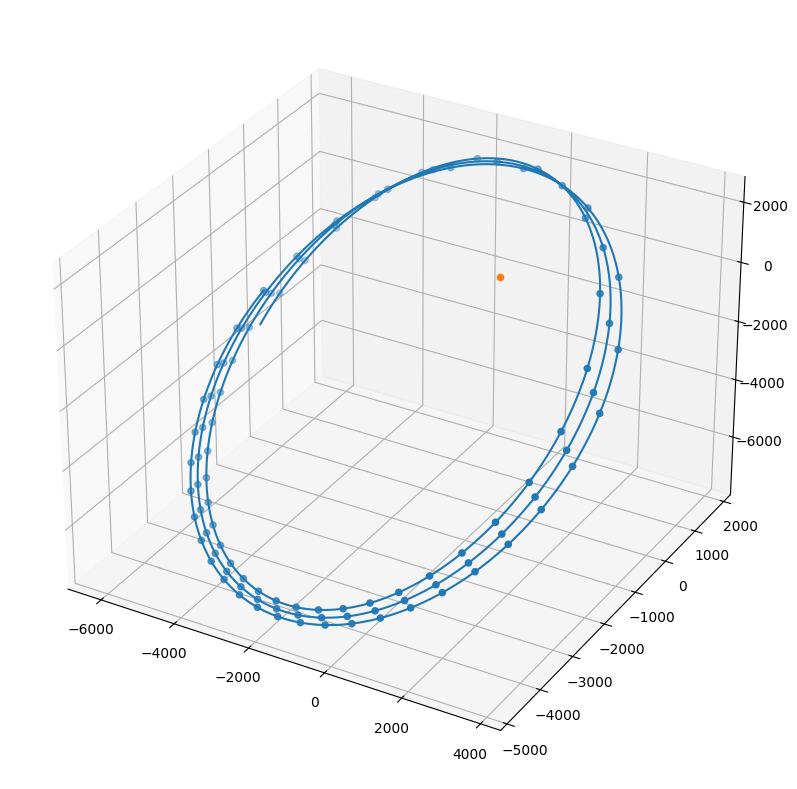

In [6]:
obs     = Observation(deltaT_sec=60)
S       = Satellite()
obsat   = ObservedSatellite(obs, S)

# fig, (p1, p2) = plt.subplots(1,2)
fig = plt.figure(figsize=plt.figaspect(0.5))
#fig.suptitle('Simulation', fontsize=20)
plt.rcParams["figure.figsize"] = [12., 6.]
#plt.rcParams["figure.autolayout"] = True


ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot3D(obsat.posxyz[:2000,0], obsat.posxyz[:2000,1], obsat.posxyz[:2000,2])
ax.scatter3D(obsat.posxyz[:2000:20,0], obsat.posxyz[:2000:20,1], obsat.posxyz[:2000:20,2])
_ = ax.scatter3D(0,0,0)

In [1]:
# ---- just keep for later
# fig     = plt.figure(figsize=(20,10))
# plt.rcParams["figure.autolayout"] = True
# ax      = plt.axes(projection='3d')
# posxyz  = obsat.posxyz

# ax.plot3D(posxyz[:2000,0],posxyz[:2000,1],posxyz[:2000,2])
# ax.scatter3D(posxyz[:2000:20,0],posxyz[:2000:20,1],posxyz[:2000:20,2])
# _ = ax.scatter3D(0,0,0)

# ax = fig.add_subplot(1, 2, 2)
# obsat.plot_tracks(ax)
# plt.show()


Text(0, 0.5, 'N-S')

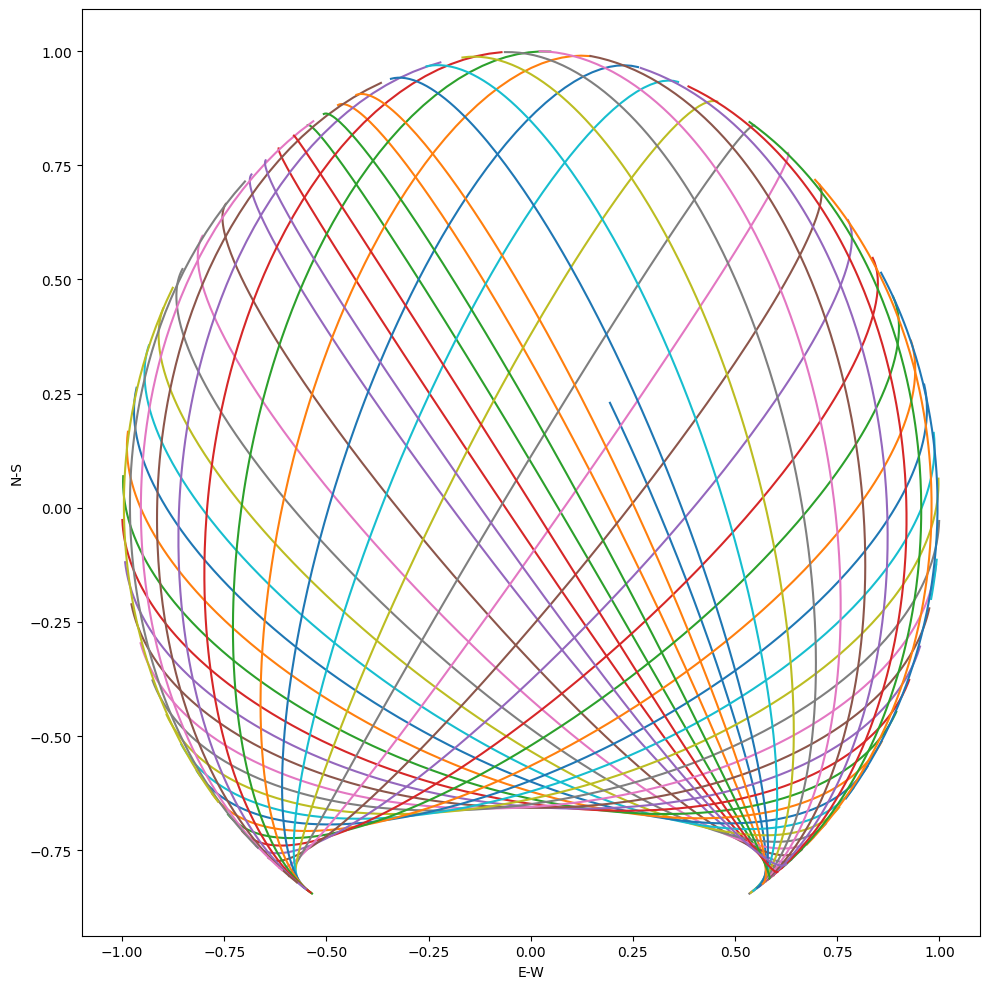

In [7]:
plt.figure(figsize=(10,10))
obsat.plot_tracks(plt)
plt.xlabel("E-W")
plt.ylabel("N-S")

In [24]:
transits = obsat.get_transit_indices()
print (len(transits))

55


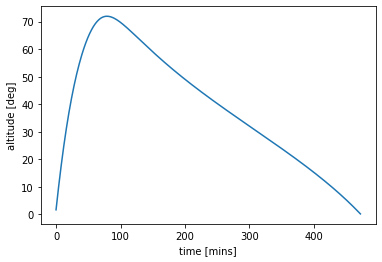

In [7]:
# Take transit #5
i,j = transits[5]
plt.plot(np.arange(j-i),obsat.alt_rad()[i:j]/np.pi*180)
plt.xlabel('time [mins]')
plt.ylabel('altitude [deg]')
pass